# IOR Benchmark Analysis

This notebook provides analysis and visualization of IOR benchmark data collected from different storage systems.

## Features:
- Collect and organize IOR benchmark data from JSON files
- Filter data by storage type, transfer size, number of nodes
- Generate comparison plots and analysis
- Export data to CSV format
- All plots are saved to the 'plot' directory

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Import our utility functions
from ior_utils import *

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create plot directory if it doesn't exist
plot_dir = "plot"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    print(f"Created plot directory: {plot_dir}")
else:
    print(f"Plot directory already exists: {plot_dir}")

print("Libraries imported successfully!")

Created plot directory: plot
Libraries imported successfully!


## 1. Data Collection and Overview

In [2]:
# Define the data directory
data_dir = "ior_data"

# Collect all IOR benchmark data
print("Collecting IOR benchmark data...")
df = collect_ior_data(data_dir)

# Display overview
print_data_overview(df)

# Show first few rows
print("First few rows of the dataset:")
df.head()

Error reading ior_data/beegfs_pior_buffered_8n/pior_4k_50gb_n16_2.json: Expecting value: line 84 column 1 (char 2590)
Error reading ior_data/beegfs_pior_buffered_8n/pior_16m_50gb_n16_3.json: Expecting value: line 84 column 1 (char 2601)
Error reading ior_data/beegfs_pior_buffered_8n/pior_1m_50gb_n16_3.json: Expecting value: line 84 column 1 (char 2594)
Error reading ior_data/beegfs_pior_buffered_8n/pior_4k_50gb_n8_3.json: Expecting value: line 84 column 1 (char 2585)
Error reading ior_data/beegfs_pior_buffered_4n/pior_16m_50gb_n256_2.json: Expecting value: line 84 column 1 (char 2605)
Error reading ior_data/ssd_ior_buffered_1n/pior_1024m_50gb_n256_1.json: Expecting value: line 84 column 1 (char 2619)
Error reading ior_data/beegfs_pior_buffered_32n/pior_4k_50gb_n256_1.json: Expecting value: line 84 column 1 (char 2706)
Error reading ior_data/beegfs_pior_buffered_32n/pior_4k_50gb_n512_2.json: Expecting value: line 84 column 1 (char 2708)
Error reading ior_data/beegfs_pior_buffered_32n/pi

,operation,randomOffset,transferSize,aggregateFilesizeMB,numTasks,totalTime,numNodes,tasksPerNode,parallelism,trMiB,storageType
0,write,0,64,1024,32,0.2710,8,4,256,3779.2831,tmpfs
1,read,0,64,1024,32,0.2328,8,4,256,4398.7939,tmpfs
2,write,0,4194304,5120,256,0.0205,8,32,2048,249298.5799,tmpfs
3,read,0,4194304,5120,256,0.0170,8,32,2048,300550.8122,tmpfs
4,write,0,67108864,1024,16,0.0236,8,2,128,43330.7556,tmpfs


In [3]:
# Remove rows where trMiB is 0
df = df[df['trMiB'] > 0]

# Save the master DataFrame
save_master_ior_df(df, 'master_ior_df.csv')

# Display basic statistics
print("\nBasic statistics:")
print(df.describe())

Master IOR DataFrame saved to master_ior_df.csv
Shape: (15726, 11)
Columns: ['operation', 'randomOffset', 'transferSize', 'aggregateFilesizeMB', 'numTasks', 'totalTime', 'numNodes', 'tasksPerNode', 'parallelism', 'trMiB', 'storageType']

Basic statistics:
       randomOffset  transferSize  aggregateFilesizeMB      numTasks  \
count       15726.0  1.572600e+04         15726.000000  15726.000000   
mean            0.0  5.901420e+07         25253.848150    191.791174   
std             0.0  1.924715e+08         28958.036269    437.071881   
min             0.0  6.400000e+01          1024.000000      2.000000   
25%             0.0  4.096000e+03          1024.000000     16.000000   
50%             0.0  1.048576e+06          5120.000000     32.000000   
75%             0.0  1.677722e+07         51200.000000    128.000000   
max             0.0  1.073742e+09        102400.000000   4096.000000   

          totalTime      numNodes  tasksPerNode    parallelism         trMiB  
count  15726.000

## 2. Data Filtering Options

In [4]:
# Example: Collect data for specific storage types only
# Uncomment and modify the line below to filter storage types

# storage_types_to_include = ['beegfs', 'ssd']  # Exclude nfs and tmpfs
# df_filtered = collect_ior_data(data_dir, storage_types=storage_types_to_include)
# save_master_ior_df(df_filtered, 'master_ior_df_filtered.csv')
# print_data_overview(df_filtered)

## 3. Storage Comparison Analysis

Comparing storage types for 1MB transfer size, 8 node(s), and 1024MB aggregate file size


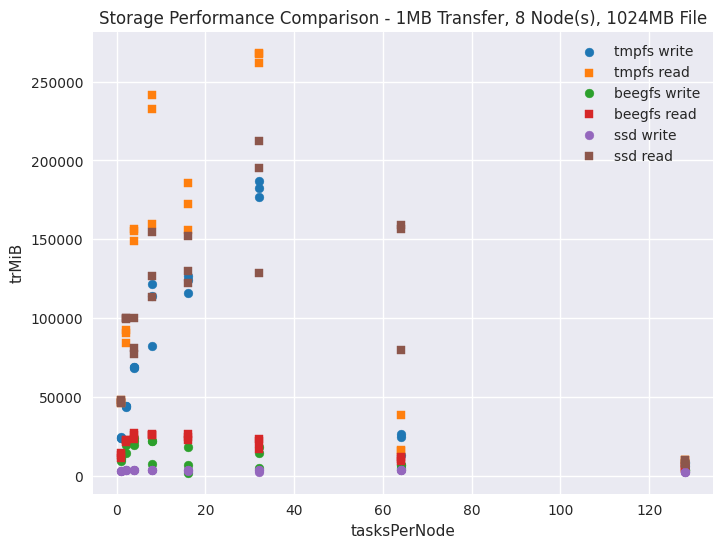

In [5]:
# Example: Compare different storage types for fixed transfer size, number of nodes, and aggregate file size

# Parameters for comparison
transfer_size_mb = 1  # 1MB transfer size
transfer_size_bytes = transfer_size_mb * 1024 * 1024
num_nodes = 8
aggregate_file_size_mb = 1024 # 5120  # Set this to the file size you want to filter by

print(f"Comparing storage types for {transfer_size_mb}MB transfer size, {num_nodes} node(s), and {aggregate_file_size_mb}MB aggregate file size")

# Create the comparison plot
plot_storage_comparison(
    df,
    transfer_size=transfer_size_bytes,
    num_nodes=num_nodes,
    title=f'Storage Performance Comparison - {transfer_size_mb}MB Transfer, {num_nodes} Node(s), {aggregate_file_size_mb}MB File',
    save_path=os.path.join(plot_dir, f'storage_comparison_{transfer_size_mb}mb_{num_nodes}node_{aggregate_file_size_mb}mbfile.png'),
    aggregate_file_size=aggregate_file_size_mb
)

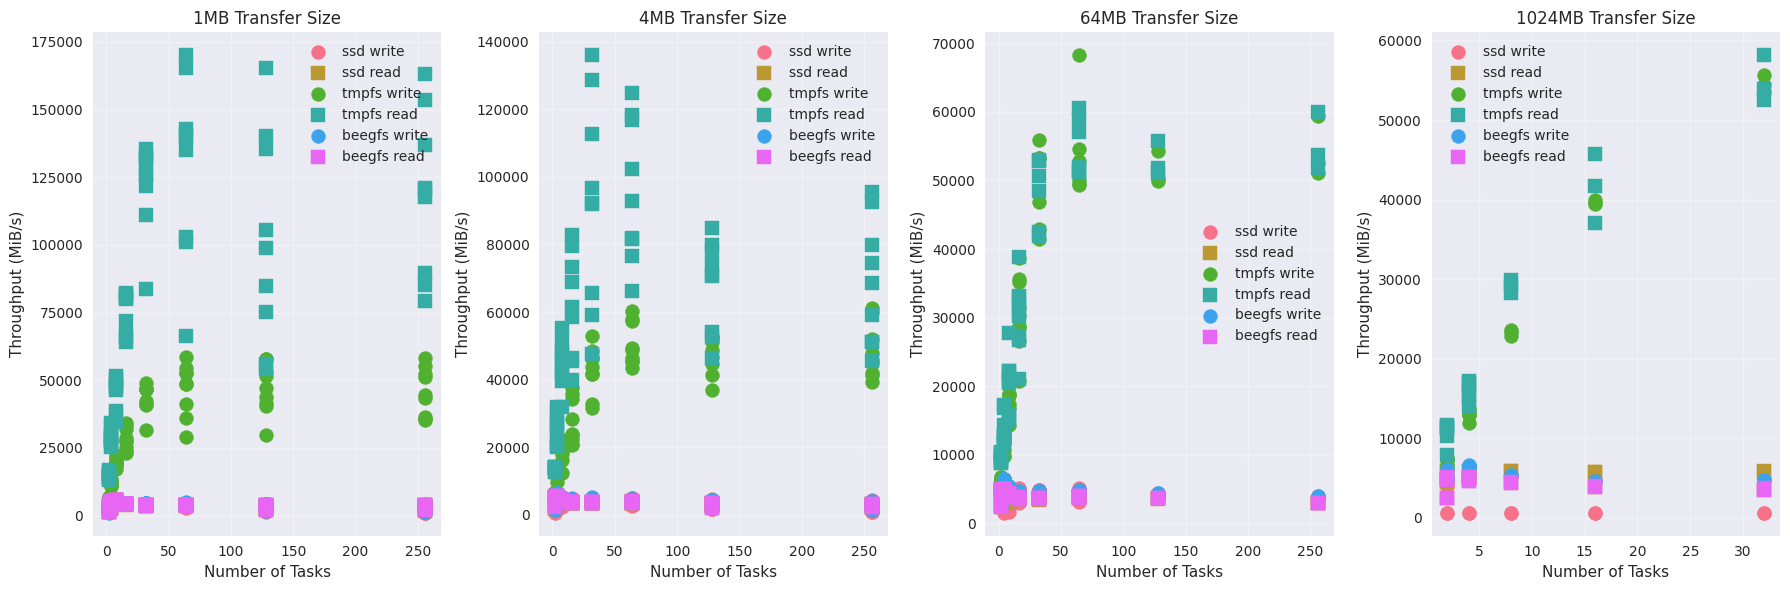

In [6]:
# Compare for different transfer sizes
transfer_sizes_mb = [1, 4, 64, 1024]  # 4MB, 64MB, 1GB
num_nodes = 1

fig, axes = plt.subplots(1, len(transfer_sizes_mb), figsize=(18, 6))

for i, transfer_size_mb in enumerate(transfer_sizes_mb):
    transfer_size_bytes = transfer_size_mb * 1024 * 1024
    
    # Filter data
    filtered_df = filter_data_by_conditions(
        df, transfer_size=transfer_size_bytes, num_nodes=num_nodes
    )
    
    if not filtered_df.empty:
        # Create subplot
        ax = axes[i]
        
        for storage_type in filtered_df['storageType'].unique():
            storage_data = filtered_df[filtered_df['storageType'] == storage_type]
            
            for operation in ['write', 'read']:
                op_data = storage_data[storage_data['operation'] == operation]
                if not op_data.empty:
                    ax.scatter(op_data['numTasks'], op_data['trMiB'], 
                               label=f'{storage_type} {operation}', 
                               marker='o' if operation == 'write' else 's',
                               s=100)
        
        ax.set_xlabel('Number of Tasks')
        ax.set_ylabel('Throughput (MiB/s)')
        ax.set_title(f'{transfer_size_mb}MB Transfer Size')
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        axes[i].text(0.5, 0.5, f'No data for {transfer_size_mb}MB', 
                     ha='center', va='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'storage_comparison_multiple_transfer_sizes.png'), dpi=300, bbox_inches='tight')
plt.show()

## 4. Transfer Size Analysis

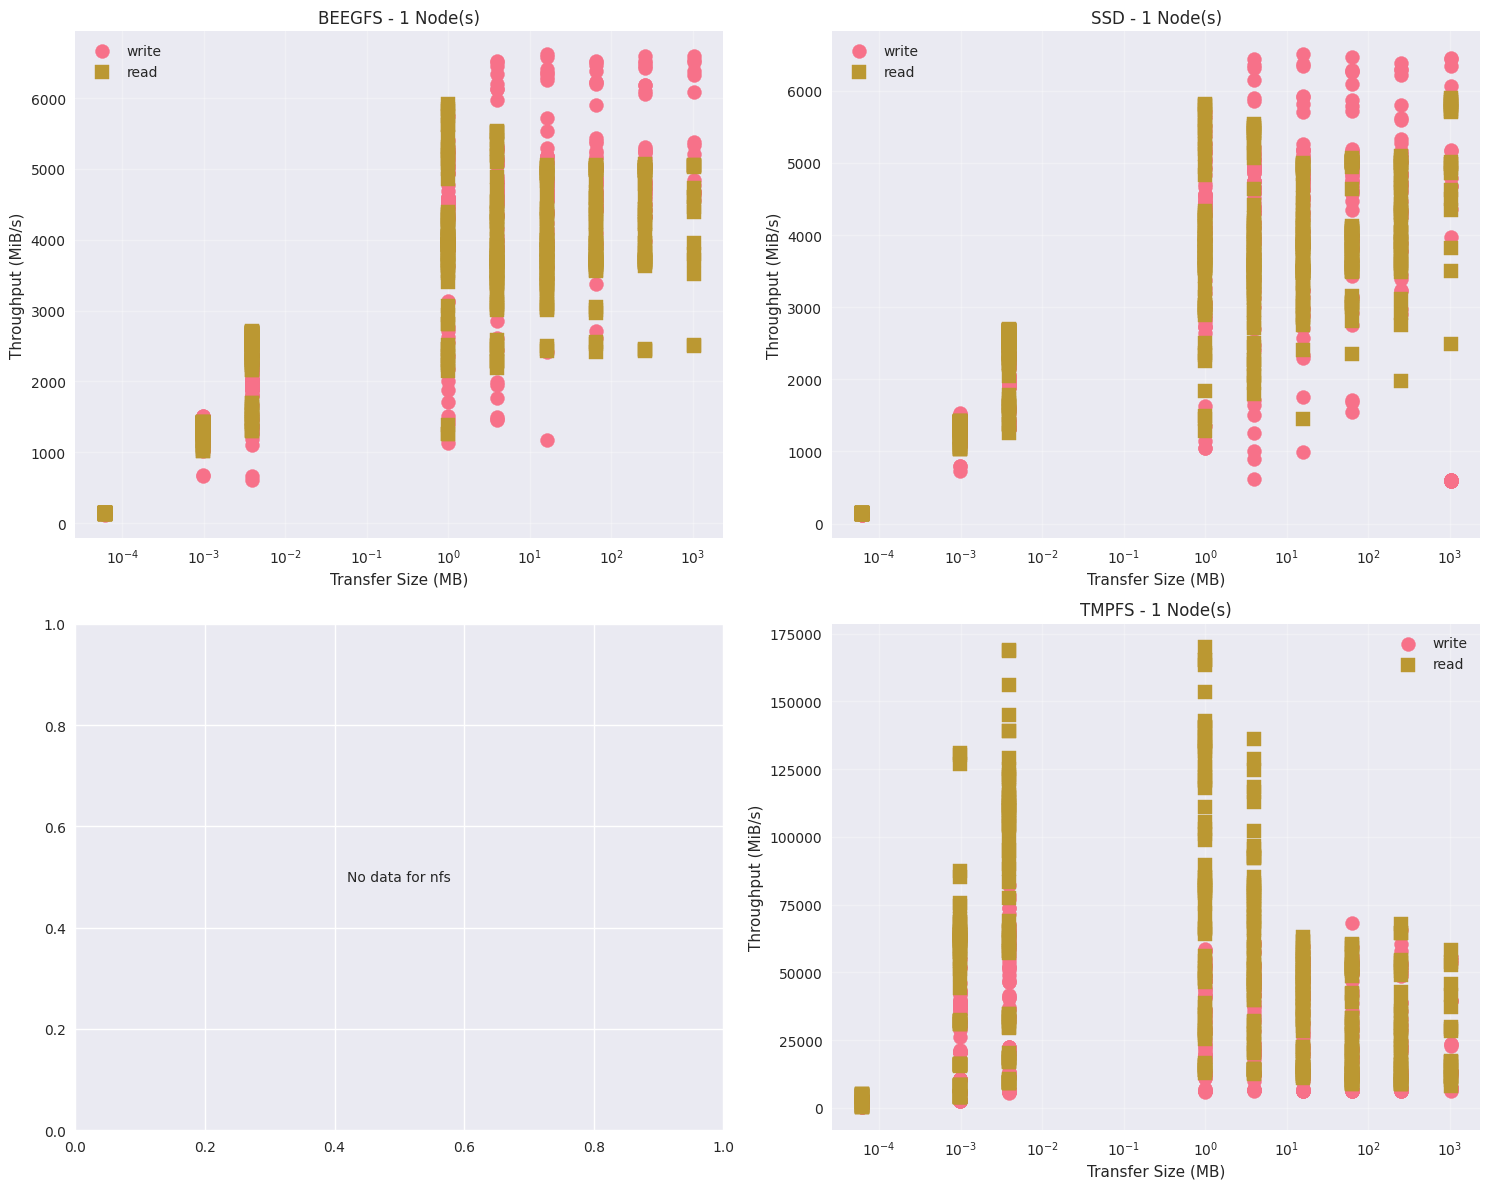

In [7]:
# Analyze transfer size impact for different storage types
storage_types = ['beegfs', 'ssd', 'nfs', 'tmpfs']
num_nodes = 1

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, storage_type in enumerate(storage_types):
    if i < len(axes):
        # Filter data
        filtered_df = filter_data_by_conditions(
            df, storage_type=storage_type, num_nodes=num_nodes
        )
        
        if not filtered_df.empty:
            ax = axes[i]
            
            for operation in ['write', 'read']:
                op_data = filtered_df[filtered_df['operation'] == operation]
                if not op_data.empty:
                    # Convert transfer size to MB for x-axis
                    transfer_sizes_mb = op_data['transferSize'] / (1024 * 1024)
                    ax.scatter(transfer_sizes_mb, op_data['trMiB'], 
                               label=f'{operation}', 
                               marker='o' if operation == 'write' else 's',
                               s=100)
            
            ax.set_xlabel('Transfer Size (MB)')
            ax.set_ylabel('Throughput (MiB/s)')
            ax.set_title(f'{storage_type.upper()} - {num_nodes} Node(s)')
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_xscale('log')
        else:
            axes[i].text(0.5, 0.5, f'No data for {storage_type}', 
                         ha='center', va='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'transfer_size_analysis_all_storage.png'), dpi=300, bbox_inches='tight')
plt.show()

Detailed transfer size analysis for BEEGFS with 1 node(s)


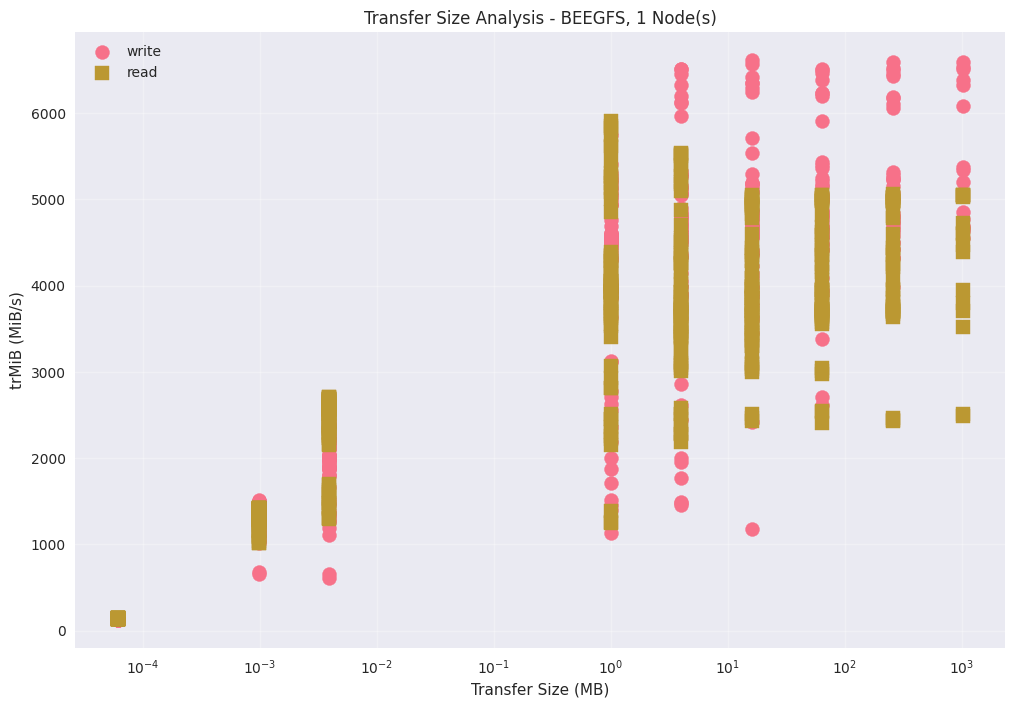

In [8]:
# Detailed analysis for a specific storage type
storage_type = 'beegfs'  # Change this to analyze different storage types
num_nodes = 1

print(f"Detailed transfer size analysis for {storage_type.upper()} with {num_nodes} node(s)")

plot_transfer_size_analysis(df, 
                           storage_type=storage_type, 
                           num_nodes=num_nodes,
                           title=f'Transfer Size Analysis - {storage_type.upper()}, {num_nodes} Node(s)',
                           save_path=os.path.join(plot_dir, f'transfer_size_analysis_{storage_type}.png'))

## 5. Scaling Analysis (Multiple Nodes)

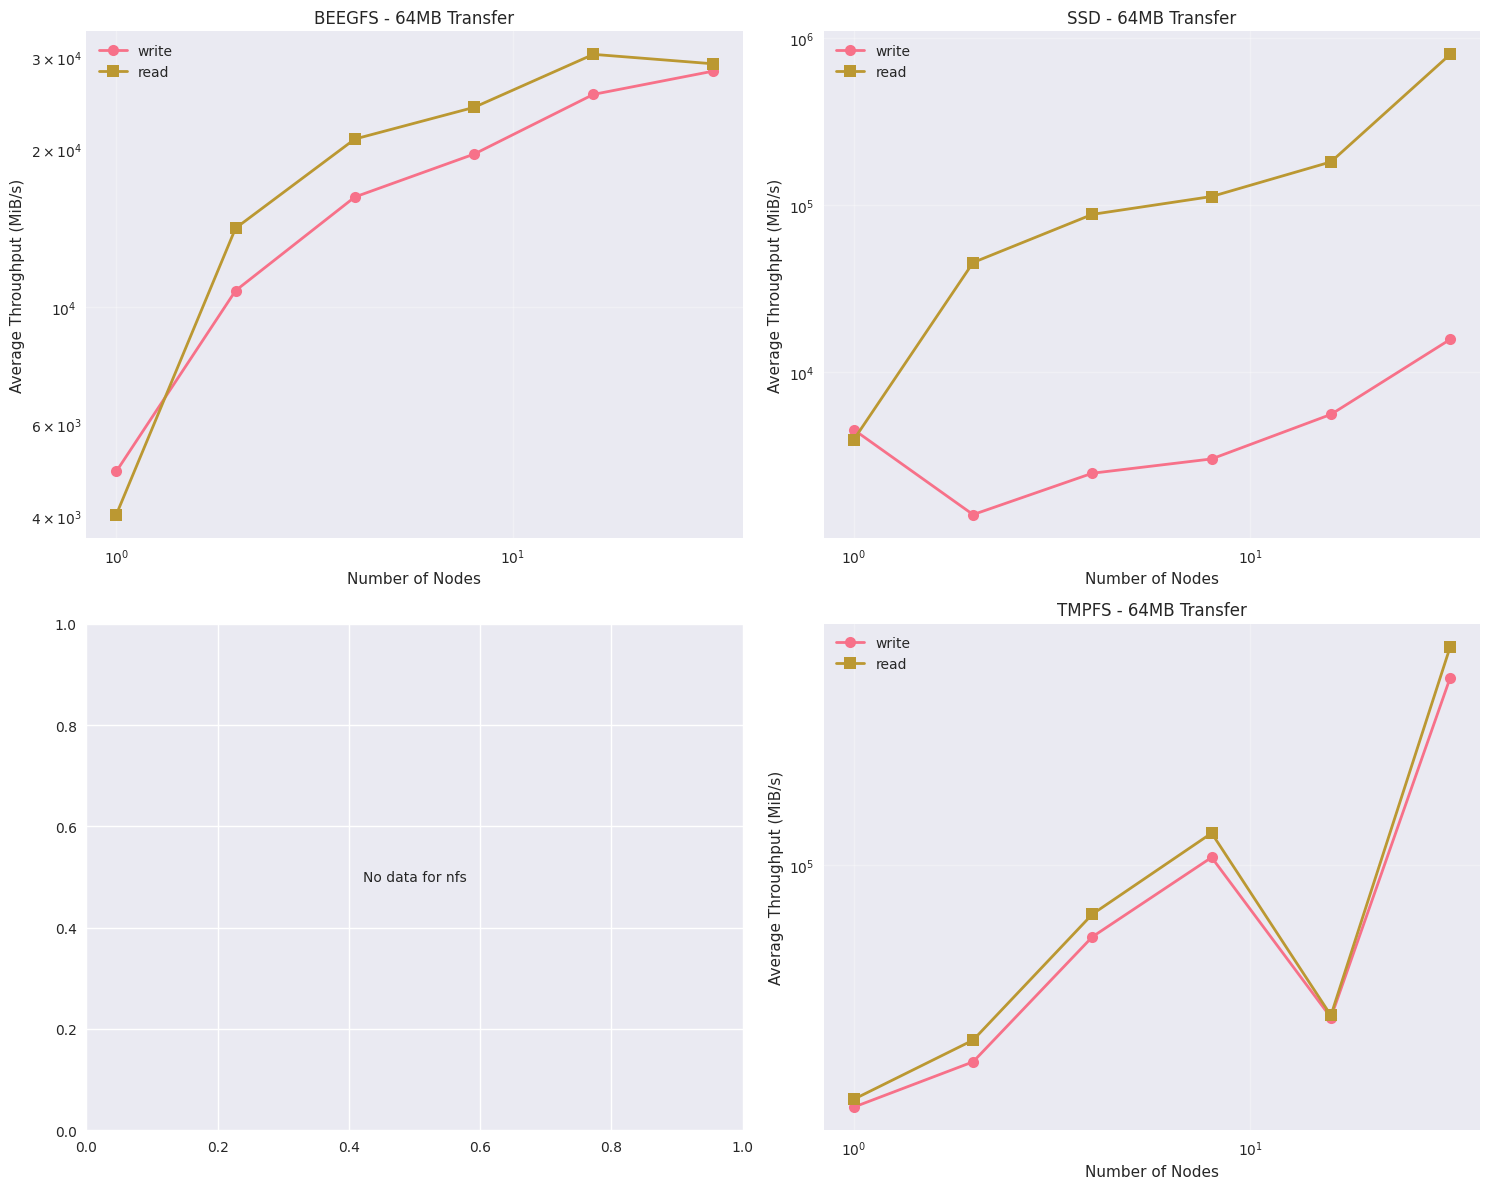

In [9]:
# Analyze scaling behavior across different numbers of nodes
transfer_size_mb = 64
transfer_size_bytes = transfer_size_mb * 1024 * 1024

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, storage_type in enumerate(['beegfs', 'ssd', 'nfs', 'tmpfs']):
    if i < len(axes):
        ax = axes[i]
        
        # Filter data for this storage type and transfer size
        filtered_df = filter_data_by_conditions(
            df, storage_type=storage_type, transfer_size=transfer_size_bytes
        )
        
        if not filtered_df.empty:
            for operation in ['write', 'read']:
                op_data = filtered_df[filtered_df['operation'] == operation]
                if not op_data.empty:
                    # Group by number of nodes and calculate mean throughput
                    scaling_data = op_data.groupby('numNodes')['trMiB'].mean().reset_index()
                    ax.plot(scaling_data['numNodes'], scaling_data['trMiB'], 
                            marker='o' if operation == 'write' else 's',
                            label=f'{operation}', linewidth=2, markersize=8)
            
            ax.set_xlabel('Number of Nodes')
            ax.set_ylabel('Average Throughput (MiB/s)')
            ax.set_title(f'{storage_type.upper()} - {transfer_size_mb}MB Transfer')
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:
            ax.text(0.5, 0.5, f'No data for {storage_type}', 
                    ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'scaling_analysis_all_storage.png'), dpi=300, bbox_inches='tight')
plt.show()

## 6. Summary Statistics

In [10]:
# Generate summary statistics
summary_stats = get_summary_statistics(df)
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                                    trMiB                                  \
                                     mean        std      min         max   
storageType operation numNodes                                              
beegfs      read      1           3140.52    1405.98   132.86     5912.27   
                      2          12257.50    6820.13   247.86    20891.17   
                      4          17975.71    8759.70   490.73    29540.80   
                      8          21113.44    8160.73   961.41    32393.80   
                      16         26767.65    9600.35  1932.78    42911.67   
                      32         24208.79    7554.16  3770.58    40568.12   
            write     1           3514.28    1795.96   121.34     6616.31   
                      2           8129.87    5315.63   234.05    17726.00   
                      4          11547.56    7712.39   395.91    27794.39   
                      8          13511.03    8704.83    

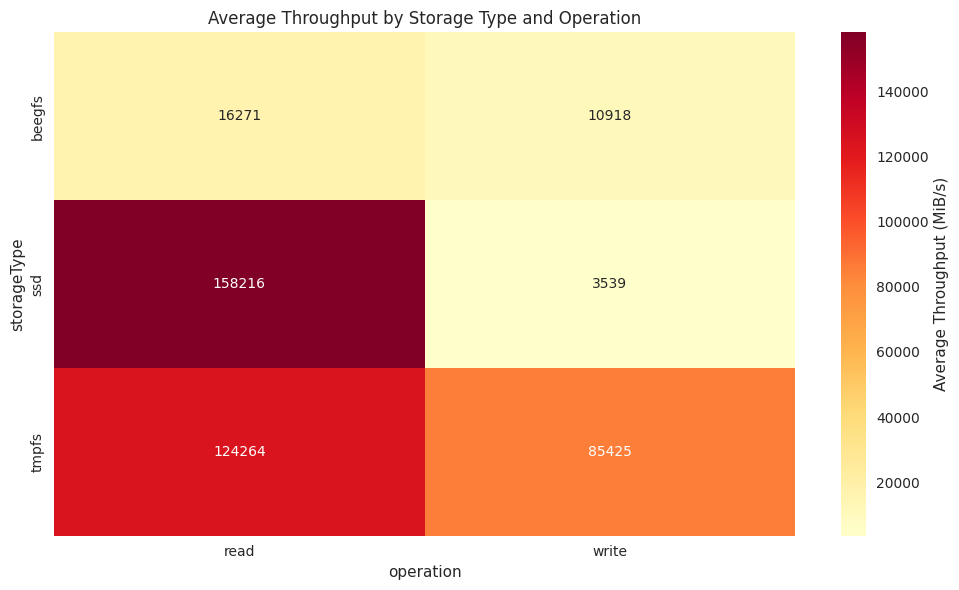

In [11]:
# Create a heatmap of average throughput by storage type and operation
pivot_data = df.groupby(['storageType', 'operation'])['trMiB'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Average Throughput (MiB/s)'})
plt.title('Average Throughput by Storage Type and Operation')
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'throughput_heatmap.png'), dpi=300, bbox_inches='tight')
plt.show()

## 7. Custom Analysis Functions

In [12]:
# Function to analyze specific conditions
def analyze_specific_conditions(df, storage_type, transfer_size_mb, num_nodes):
    """
    Analyze data for specific conditions and create detailed plots.
    """
    transfer_size_bytes = transfer_size_mb * 1024 * 1024
    
    # Filter data
    filtered_df = filter_data_by_conditions(
        df, storage_type=storage_type, transfer_size=transfer_size_bytes, num_nodes=num_nodes
    )
    
    if filtered_df.empty:
        print(f"No data found for {storage_type}, {transfer_size_mb}MB, {num_nodes} nodes")
        return
    
    print(f"Analysis for {storage_type.upper()}, {transfer_size_mb}MB transfer, {num_nodes} node(s):")
    print(f"Number of data points: {len(filtered_df)}")
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Throughput vs Number of Tasks
    ax1 = axes[0]
    for operation in ['write', 'read']:
        op_data = filtered_df[filtered_df['operation'] == operation]
        if not op_data.empty:
            ax1.scatter(op_data['numTasks'], op_data['trMiB'], 
                        label=f'{operation}', 
                        marker='o' if operation == 'write' else 's',
                        s=100)
    
    ax1.set_xlabel('Number of Tasks')
    ax1.set_ylabel('Throughput (MiB/s)')
    ax1.set_title('Throughput vs Number of Tasks')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Total Time vs Number of Tasks
    ax2 = axes[1]
    for operation in ['write', 'read']:
        op_data = filtered_df[filtered_df['operation'] == operation]
        if not op_data.empty:
            ax2.scatter(op_data['numTasks'], op_data['totalTime'], 
                        label=f'{operation}', 
                        marker='o' if operation == 'write' else 's',
                        s=100)
    
    ax2.set_xlabel('Number of Tasks')
    ax2.set_ylabel('Total Time (seconds)')
    ax2.set_title('Total Time vs Number of Tasks')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f'detailed_analysis_{storage_type}_{transfer_size_mb}mb_{num_nodes}nodes.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print("\nStatistics:")
    print(filtered_df.groupby('operation')[['trMiB', 'totalTime']].describe())

Analysis for BEEGFS, 64MB transfer, 1 node(s):
Number of data points: 108


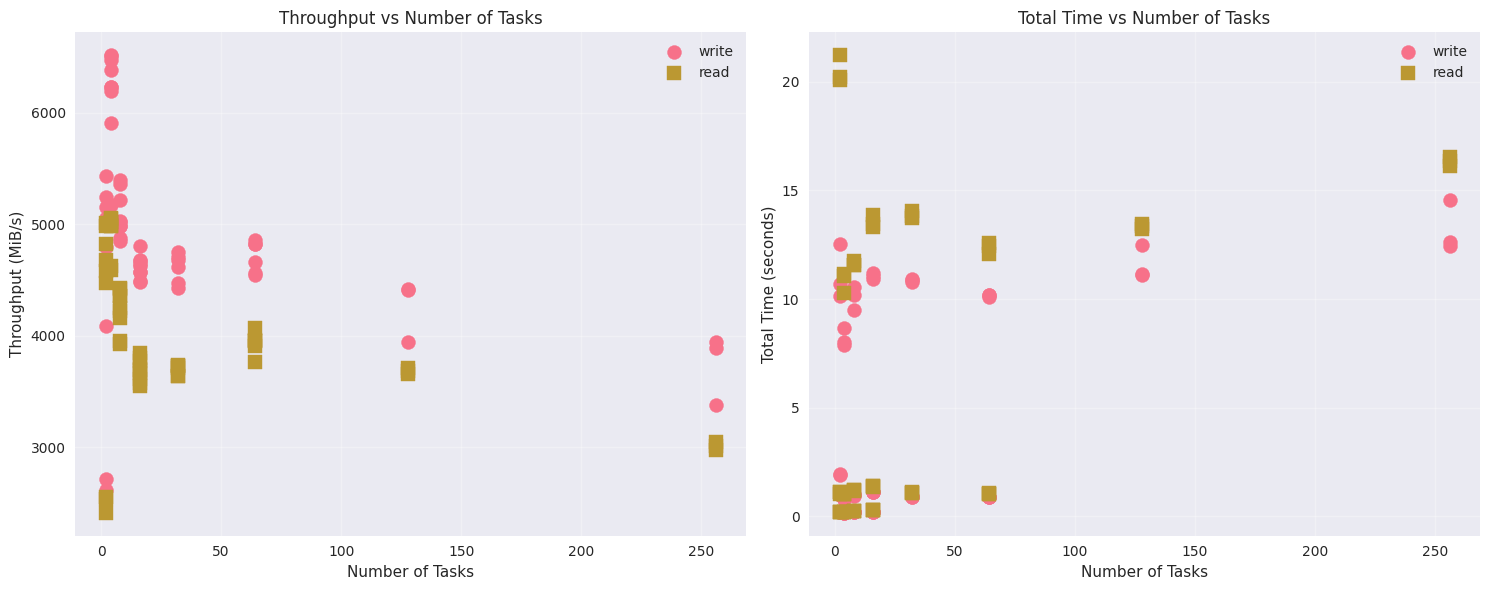


Statistics:
          trMiB                                                               \
          count         mean         std        min          25%         50%   
operation                                                                      
read       54.0  4028.256978  671.901787  2412.6119  3685.069175  3938.50870   
write      54.0  4868.724502  815.518138  2613.7204  4551.951050  4797.29065   

                                  totalTime                              \
                   75%        max     count      mean       std     min   
operation                                                                 
read       4556.004575  5056.8435      54.0  6.679263  6.944344  0.2029   
write      5166.304925  6515.6960      54.0  5.191561  5.157108  0.1643   

                                                
              25%      50%        75%      max  
operation                                       
read       1.0251  1.28495  13.301325  21.2218  
write      0.8

In [13]:
# Example usage of custom analysis
analyze_specific_conditions(df, 'beegfs', 64, 1)

## 8. Data Export and Final Summary

In [14]:
# Export filtered datasets for further analysis

# Export data for each storage type separately
for storage_type in df['storageType'].unique():
    storage_df = filter_data_by_conditions(df, storage_type=storage_type)
    filename = f'ior_data_{storage_type}.csv'
    storage_df.to_csv(filename, index=False)
    print(f"Exported {storage_type} data to {filename} ({len(storage_df)} records)")

# Export summary statistics
summary_stats.to_csv('ior_summary_statistics.csv')
print("\nExported summary statistics to ior_summary_statistics.csv")

print("\n=== Analysis Complete ===")
print(f"Total records processed: {len(df)}")
print(f"Storage types analyzed: {sorted(df['storageType'].unique())}")
print(f"Number of nodes tested: {sorted(df['numNodes'].unique())}")
print(f"Transfer sizes tested: {sorted(df['transferSize'].unique() // (1024*1024))} MB")
print(f"\nAll plots have been saved to the '{plot_dir}' directory.")

Exported tmpfs data to ior_data_tmpfs.csv (5244 records)
Exported ssd data to ior_data_ssd.csv (5734 records)
Exported beegfs data to ior_data_beegfs.csv (4748 records)

Exported summary statistics to ior_summary_statistics.csv

=== Analysis Complete ===
Total records processed: 15726
Storage types analyzed: ['beegfs', 'ssd', 'tmpfs']
Number of nodes tested: [np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32)]
Transfer sizes tested: [np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(4), np.int64(16), np.int64(64), np.int64(256), np.int64(1024)] MB

All plots have been saved to the 'plot' directory.
